Clément Yvernes & Samuel Bounan

# Report: elaboration of an artificial Pickomino player

## Part I

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from game import *

### Part 1.1) Implementation

### Part 1.2) Results

Illustration of our code with throw: (1, 3, 3, 3, 4, 4, 5, W ).

In [22]:
player = Player()
initial_throw = dice2state((1, 3, 3, 3, 4, 4, 5, 0))
print(player.strategy(initial_throw, 0, 8, 0))


(4, 0.8289434159210631)


We can test the strategy function by estimating the true expectancy of the strategy. To do so, the following code simulates a single round for N times and computes the estimated expectancy. The experiment have been run on 10 000 000 samples (11min30s), the estimated expectancy was 1.6083139. The Central Limit Theorem tells us that we should get the correct value up to approximatively 3 digits. Therefore, it is very likely that the strategy method is correct.

In [23]:
player = Player()
average_reward = 0
N = 10000
for idx in range(N):
    nb_available_dice = 8
    score = 0
    previous_choices = 0
    for i in range(8):
        """
        print(f"Turn {i} ----------------------------")
        print("nb_available_dice before:", nb_available_dice)
        print("score before:", score)
        print("previous_choices before:", bin(previous_choices))
        print("--")
        """
        #draw a dice
        if i == 0:
            dice_results = dice2state((1, 3, 3, 3, 4, 4, 5, 0))
        else:
            dice_results = draw_dice(nb_available_dice)
        player_choice = player.play_dice(dice_results, previous_choices, nb_available_dice, score)
        """
        print("dice_results: ", dice_results)
        print("player_choice:", player_choice)
        """
        if player_choice is None:
            average_reward += -player.C
            break
        elif player_choice == -1:
            average_reward += player.rewardfun(score) if previous_choices % 2 == 1 else -player.C
            break
        else:
            nb_available_dice -= dice_results[player_choice]
            score += (player_choice if player_choice else 5)*dice_results[player_choice]
            previous_choices |= 1 << player_choice
            """"
            print("nb_available_dice after:", nb_available_dice)
            print("score after:", score)
            print("previous_choices after:", bin(previous_choices))
            """
            if (previous_choices == 63):
                average_reward += player.rewardfun(score)
                break
            elif not nb_available_dice:
                average_reward += player.rewardfun(score) if previous_choices % 2 == 1 else -player.C
                break      
                
        
    
    
average_score = average_reward / N
print(average_score)

0.8352


In [24]:
def collectedDices2PreviousChoices(collected_dices):
    rep = 0
    for dice in set(collected_dices):
        rep |= 1 << dice
    return(rep)

def collectedDices2Previousscore(collected_dices):
    rep = 0
    for dice in collected_dices:
        rep += dice if dice else 5
    return(rep)

player = Player()
average_reward = 0
N = 10000
for idx in range(N):
    nb_available_dice = 8
    collected_dices = []
    score = 0
    for i in range(9):
        #print(i)
        #draw dices
        if i == 0:
            dice_results = dice2state((1, 3, 3, 3, 4, 4, 5, 0))
        else:
            dice_results = draw_dice(nb_available_dice)
        #print(dice_results)
        
        previous_choices = collectedDices2PreviousChoices(collected_dices)
        score = collectedDices2Previousscore(collected_dices)
        player_choice = player.play_dice(dice_results, previous_choices, nb_available_dice, score)
        if player_choice is None:
            average_reward += -player.C
            break
        elif player_choice == -1:
            average_reward += player.rewardfun(score) if 0 in collected_dices else -player.C
            break
        else:
            nb_available_dice -= dice_results[player_choice]
            # add selected dices to collected dices
            collected_dices += [player_choice]*dice_results[player_choice]
    #print("collected_dices", collected_dices, score)

    
average_score = average_reward / N
print(average_score)

0.8267


Thus the strategy chooses to take the two 4s, with an expected reward of ~1.6 pickominos. If we change the `C` value, the strategy will be different, and could pick other dice.

In [25]:
player.set_C(3)
initial_throw = dice2state((1, 3, 3, 3, 4, 4, 5, 0))
print(player.strategy(initial_throw, 0, 8, 0))

(4, -0.5110454755081502)


Indeed we see that if the strategy still picks 4s, the expected reward has changed. It is now ~1.1.

One can also compute the maximal probability of obtaining a Pickomino with `i` or more pickominos: by putting the reward of obtaining a pickomino with `i` or more pickominos to 1 and the other to 0, the expected reward will directly be the probability we want.

In [26]:
player = Player()
player.set_C(0)
basic_r = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]

for i in range(1, 5):
    reward_vec = [r >= i for r in basic_r]
    player.set_r(reward_vec)
    print(f"Proba to have {i} or more pickominos: {player.expectancy(0,8,0):.2f}")

Proba to have 1 or more pickominos: 0.69
Proba to have 2 or more pickominos: 0.43
Proba to have 3 or more pickominos: 0.21
Proba to have 4 or more pickominos: 0.07


We can use the same idea of modifying the reward vector to compute the maximal probability of obtaining exactly Tile 24. However, we can't use PLayer class to do so. Indeed, a PLayer will take the best tile available under its score. To compute this quantity, we need a player that picks the tile corresponding to its score. This as been implemented by the Player_select_Tile_equal_score class.

In [27]:
player_designed_for_this_question = Player_select_Tile_equal_score()
player_designed_for_this_question.set_r([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
print(player_designed_for_this_question.expectancy(0,8,0))

0.24658730831893289


We can compute the maximum probability of obtaining exactly each tile:

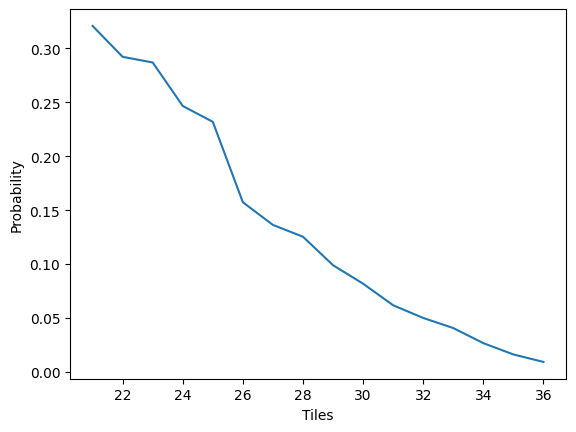

In [28]:
player_designed_for_this_question = Player_select_Tile_equal_score()

basic_r = [0]*16
tiles = []
maximum_probability = []
for i in range(16):
    temp = basic_r.copy()
    temp[i] = 1
    player_designed_for_this_question.set_r(temp)
    tiles.append(21 + i)
    maximum_probability.append(player_designed_for_this_question.expectancy(0,8,0))
    
plt.plot(tiles, maximum_probability, label="Maximum probability to reach the desired tile")
plt.xlabel("Tiles")
plt.ylabel("Probability")
plt.show()

... or Tile 27 or higher

In [29]:
player.set_r([0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
print(player.expectancy(0,8,0))

0.31024800694099924


We can compute this quantity for any score from 21 to 36

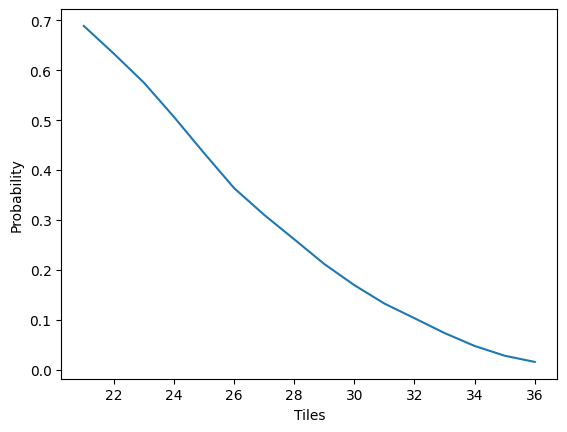

In [30]:
temp = [1]*16
tiles = []
probability = []
for i in range(16):
    if i:
        temp[i-1] = 0
    player.set_r(temp)
    tiles.append(21 + i)
    probability.append(player.expectancy(0,8,0))
    
plt.plot(tiles, probability, label="Probability to reach the desired tile or higher")
plt.xlabel("Tiles")
plt.ylabel("Probability")
plt.show()

## Part II

